# 5 Year Survival

The probablity of surviving next $g$ years (if one is already $x$ year old)
$$P(X > x + g|X > x) = \dfrac{P(X > x + g)}{P(X > x)}=\dfrac{S_{x+g}}{S_{x}}$$
where $X$ - age of death


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_excel('assets/lifetime.xlsx')
d = df.apply(lambda x: (x.DATE1 - x.BIRTHDATE).days/365.25, axis=1)
d.dropna(inplace=True)
d = d[(d>0)&(d<120)].astype(int)
d.describe()

count    56694.000000
mean        80.098405
std         12.344457
min          0.000000
25%         74.000000
50%         82.000000
75%         89.000000
max        114.000000
dtype: float64

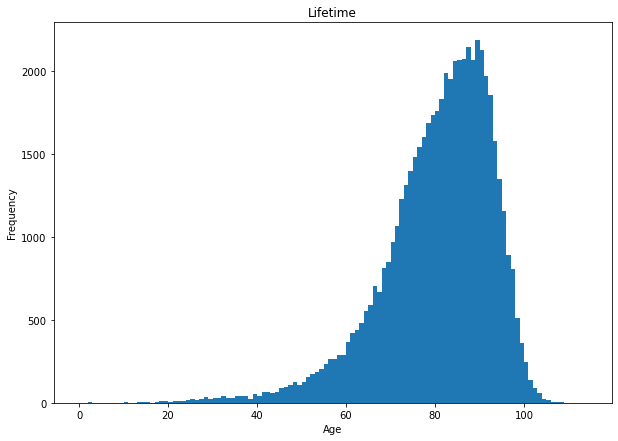

In [3]:
plt.figure(figsize=(10, 7))
plt.hist(d, bins=d.max());
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Lifetime')
plt.show()

In [4]:
g=5

c = d.value_counts()

# add zeros for missing values and calculate cumulative sum
index = pd.RangeIndex(start=c.index.min(), stop=c.index.max()+g+1, step=1, name="year")
s = pd.Series(c, index=index).fillna(0).sort_index(ascending=False).cumsum()

# join with a shifted array and reindex
l = len(s)
s5 = s[0:l-g]
s0 = s[g:l]
s5.index=s5.index-g

p = s5/s0

In [5]:
pd.DataFrame({'cumsum':s0, 'result':p}).head(15)

,cumsum,result
year,,
114,1.0,0.000000
113,1.0,0.000000
112,1.0,0.000000
111,1.0,0.000000
110,2.0,0.000000
109,3.0,0.333333
108,5.0,0.200000
107,7.0,0.142857
106,14.0,0.071429


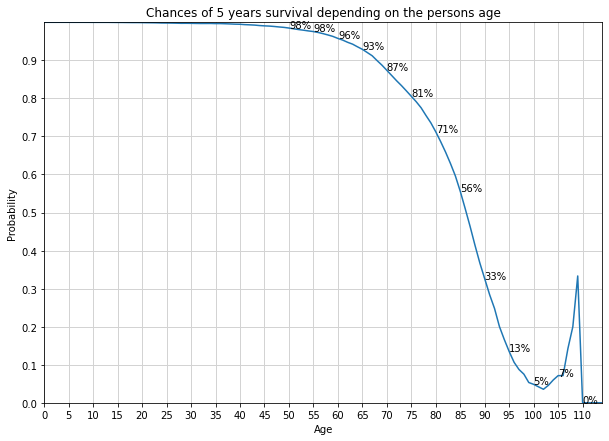

In [6]:
fig,ax = plt.subplots(figsize=(10, 7))

plt.title('Chances of {} years survival depending on the persons age'.format(g))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.plot(p.index, p)
plt.xlim(0, 114)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 115, g))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

for i in range(50,114,g):
    plt.text(i, p.loc[i], '{:.0%}'.format(p.loc[i]))
plt.show()